In [3]:
 %load_ext sql
 %sql  sqlite:///fluggesellschaft.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


# Klassenarbeit 1
Bitte hier Ihren Namen eintragen:


Gegeben ist folgendes Entity-Relationship-Modell (ERM) zu der Fluggesellschaft-Datenbank.

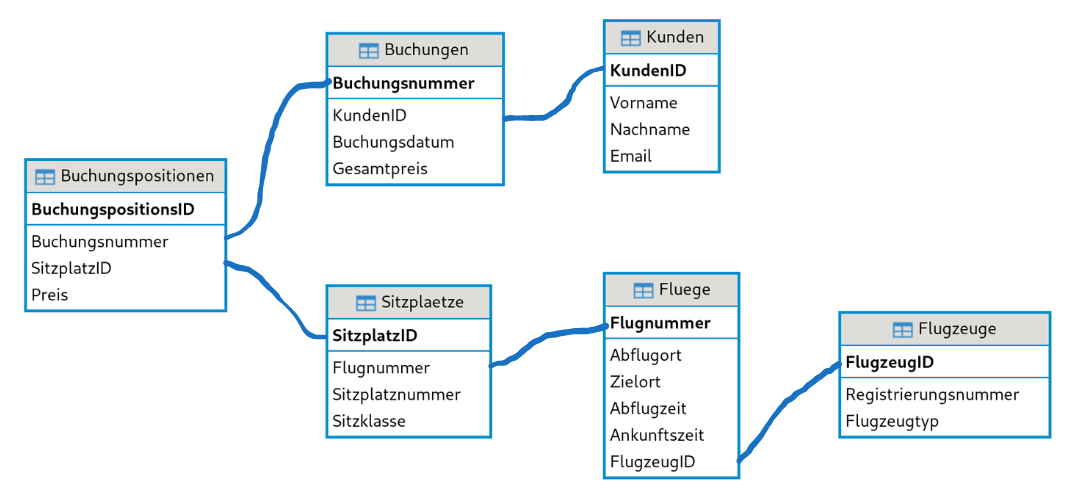

## Aufgabe 1 [1 P]:

Liste aller Flugzeuge, sortiert nach Registrierungsnummer aufsteigend

In [4]:
%%sql
SELECT * FROM Flugzeuge ORDER BY Registrierungsnummer ASC;

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


FlugzeugID,Registrierungsnummer,Flugzeugtyp
1,D-ABCD,Airbus A320
8,D-CDEF,Bombardier CRJ900
2,D-EFGH,Boeing 737
9,D-GHIJ,Airbus A321
3,D-IJKL,Airbus A330
10,D-JKLM,Boeing 757
4,D-MNOP,Boeing 747
5,D-QRST,Airbus A350
6,D-UVWX,Boeing 777
7,D-YZAB,Embraer E190


## Aufgabe 2 [1 P]:
Finde alle Flüge, die von Berlin abfliegen:

In [6]:
%%sql
SELECT * FROM Fluege WHERE Abflugort = 'Berlin';

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


Flugnummer,Abflugort,Zielort,Abflugzeit,Ankunftszeit,FlugzeugID
1001,Berlin,München,2024-01-01 08:00:00,2024-01-01 09:30:00,1
1005,Berlin,Düsseldorf,2024-01-01 16:00:00,2024-01-01 17:00:00,3
1007,Berlin,Stuttgart,2024-01-01 20:00:00,2024-01-01 21:30:00,4


## Aufgabe 3 [1 P]:
Zeige alle Kunden, deren Nachname mit 'M' beginnt:

In [7]:
%%sql
SELECT * FROM Kunden WHERE Nachname LIKE 'M%';

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


KundenID,Vorname,Nachname,Email
1,Max,Mustermann,max.mustermann@example.com
2,Erika,Musterfrau,erika.musterfrau@example.com
3,Hans,Müller,hans.mueller@example.com
5,Peter,Meier,peter.meier@example.com


## Aufgabe 4 [1 P]:
Liste der Sitzplätze in der Economy-Klasse, sortiert nach Sitzplatznummer absteigend:

In [9]:
%%sql
SELECT * FROM Sitzplaetze WHERE Sitzklasse = 'Economy' ORDER BY Sitzplatznummer DESC;



   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


SitzplatzID,Flugnummer,Sitzplatznummer,Sitzklasse
5,1001,3A,Economy
4,1001,2B,Economy
9,1002,2B,Economy
13,1003,2B,Economy
17,1004,2B,Economy
3,1001,2A,Economy
8,1002,2A,Economy
12,1003,2A,Economy
16,1004,2A,Economy
20,1005,2A,Economy


## Aufgabe 5 [1 P]:
Finde alle Buchungen, die nach dem 1. Januar 2024 getätigt wurden:


In [10]:
%%sql
SELECT * FROM Buchungen WHERE Buchungsdatum > '2024-01-01';

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


Buchungsnummer,KundenID,Buchungsdatum,Gesamtpreis
1,1,2024-01-01 07:00:00,250.0
2,1,2024-01-02 09:00:00,300.0
3,2,2024-01-01 09:00:00,150.0
4,2,2024-01-02 10:00:00,200.0
5,3,2024-01-01 11:00:00,180.0
6,3,2024-01-03 12:00:00,220.0
7,4,2024-01-01 13:00:00,210.0
8,5,2024-01-02 14:00:00,230.0
9,6,2024-01-02 15:00:00,240.0
10,7,2024-01-03 16:00:00,260.0


## Aufgabe 6 [2 P]:
Liste der Flüge mit den entsprechenden Flugzeugtypen:

In [12]:
%%sql
SELECT Fluege.Flugnummer, Flugzeuge.Flugzeugtyp 
FROM Fluege, Flugzeuge 
WHERE Fluege.FlugzeugID = Flugzeuge.FlugzeugID;

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


Flugnummer,Flugzeugtyp
1001,Airbus A320
1002,Boeing 737
1003,Airbus A320
1004,Boeing 737
1005,Airbus A330
1006,Airbus A330
1007,Boeing 747
1008,Boeing 747
1009,Airbus A350
1010,Airbus A350


## Aufgabe 7 [2 P]:
Finde alle Sitzplätze für den Flug mit der Flugnummer 1001:

In [15]:
%%sql
SELECT Sitzplaetze.Sitzplatznummer, Sitzplaetze.Sitzklasse, Fluege.Flugnummer
FROM Sitzplaetze, Fluege 
WHERE Sitzplaetze.Flugnummer = Fluege.Flugnummer 
AND Fluege.Flugnummer = 1001;

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


Sitzplatznummer,Sitzklasse,Flugnummer
1A,Business,1001
1B,Business,1001
2A,Economy,1001
2B,Economy,1001
3A,Economy,1001


## Aufgabe 8 [2 P]:
Liste der Buchungen mit den entsprechenden Kundennamen:

In [16]:
%%sql
SELECT Buchungen.Buchungsnummer, Kunden.Vorname, Kunden.Nachname 
FROM Buchungen, Kunden 
WHERE Buchungen.KundenID = Kunden.KundenID;

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


Buchungsnummer,Vorname,Nachname
1,Max,Mustermann
2,Max,Mustermann
3,Erika,Musterfrau
4,Erika,Musterfrau
5,Hans,Müller
6,Hans,Müller
7,Anna,Schmidt
8,Peter,Meier
9,Laura,Schneider
10,Tom,Fischer


## Aufgabe 9 [2 P]:
Finde alle Flüge, die von einem "Airbus A320" durchgeführt werden:

In [18]:
%%sql
SELECT Fluege.Flugnummer, Fluege.Abflugort, Fluege.Zielort 
FROM Fluege, Flugzeuge 
WHERE Fluege.FlugzeugID = Flugzeuge.FlugzeugID 
AND Flugzeuge.Flugzeugtyp = 'Airbus A320';

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


Flugnummer,Abflugort,Zielort
1001,Berlin,München
1003,München,Berlin


## Aufgabe 10 [3 P]:
Finde alle Buchungspositionen mit den entsprechenden Sitzplatznummern und Flugnummern:

In [20]:
%%sql
SELECT Buchungspositionen.BuchungspositionsID, Sitzplaetze.Sitzplatznummer, Fluege.Flugnummer 
FROM Buchungspositionen, Sitzplaetze, Fluege 
WHERE Buchungspositionen.SitzplatzID = Sitzplaetze.SitzplatzID 
AND Sitzplaetze.Flugnummer = Fluege.Flugnummer;

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


BuchungspositionsID,Sitzplatznummer,Flugnummer
1,1A,1001
2,1B,1001
3,2A,1001
4,2B,1001
5,3A,1001
6,1A,1002
7,1B,1002
8,2A,1002
9,2B,1002
10,1A,1003


## Aufgabe 11 [3 P]:
Finde alle Buchungen mit den entsprechenden Sitzplatzklassen und Preisen:

In [21]:
%%sql
SELECT Buchungen.Buchungsnummer, Sitzplaetze.Sitzklasse, Buchungspositionen.Preis 
FROM Buchungen, Buchungspositionen, Sitzplaetze 
WHERE Buchungen.Buchungsnummer = Buchungspositionen.Buchungsnummer 
AND Buchungspositionen.SitzplatzID = Sitzplaetze.SitzplatzID;

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


Buchungsnummer,Sitzklasse,Preis
1,Business,125.0
1,Business,125.0
2,Economy,150.0
2,Economy,150.0
3,Economy,75.0
3,Business,75.0
4,Business,100.0
5,Economy,115.0
6,Economy,120.0
7,Business,130.0


## Aufgabe 12 [4 P]:
Liste der Kunden, die einen Flug von Berlin nach München gebucht haben:

In [26]:
%%sql
SELECT Kunden.Vorname, Kunden.Nachname, Fluege.Abflugort, Fluege.Zielort
FROM Kunden, Buchungen, Buchungspositionen, Sitzplaetze, Fluege 
WHERE Kunden.KundenID = Buchungen.KundenID 
AND Buchungen.Buchungsnummer = Buchungspositionen.Buchungsnummer 
AND Buchungspositionen.SitzplatzID = Sitzplaetze.SitzplatzID 
AND Sitzplaetze.Flugnummer = Fluege.Flugnummer 
AND Fluege.Abflugort = 'Berlin' 
AND Fluege.Zielort = 'München';

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


Vorname,Nachname,Abflugort,Zielort
Max,Mustermann,Berlin,München
Max,Mustermann,Berlin,München
Max,Mustermann,Berlin,München
Max,Mustermann,Berlin,München
Erika,Musterfrau,Berlin,München


## Aufgabe 13 [4 P]:
Finde alle Flüge, die von Kunden mit dem Nachnamen 'Schmidt' gebucht wurden:

In [24]:
%%sql
SELECT Fluege.Flugnummer, Fluege.Abflugort, Fluege.Zielort, Kunden.Nachname 
FROM Fluege, Buchungen, Buchungspositionen, Sitzplaetze, Kunden 
WHERE Fluege.Flugnummer = Sitzplaetze.Flugnummer 
AND Sitzplaetze.SitzplatzID = Buchungspositionen.SitzplatzID 
AND Buchungspositionen.Buchungsnummer = Buchungen.Buchungsnummer 
AND Buchungen.KundenID = Kunden.KundenID 
AND Kunden.Nachname = 'Schmidt';

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


Flugnummer,Abflugort,Zielort,Nachname
1003,München,Berlin,Schmidt


## Aufgabe 14 [2 P]:
Finde alle Kunden, deren Vorname 'Max' ist oder deren Nachname mit 'M' beginnt:

In [27]:
%%sql
SELECT * FROM Kunden WHERE Vorname = 'Max' OR Nachname LIKE 'M%';

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


KundenID,Vorname,Nachname,Email
1,Max,Mustermann,max.mustermann@example.com
2,Erika,Musterfrau,erika.musterfrau@example.com
3,Hans,Müller,hans.mueller@example.com
5,Peter,Meier,peter.meier@example.com


## Aufgabe 15 [4 P]:
Liste der Flüge, die entweder nach München fliegen oder von einem Airbus A320 durchgeführt werden:

In [29]:
%%sql
SELECT Fluege.Flugnummer, Fluege.Abflugort, Fluege.Zielort 
FROM Fluege, Flugzeuge 
WHERE (Fluege.Zielort = 'München' OR Flugzeuge.Flugzeugtyp = 'Airbus A320') 
AND Fluege.FlugzeugID = Flugzeuge.FlugzeugID;

   sqlite:///fluggesellschaft
 * sqlite:///fluggesellschaft.db
Done.


Flugnummer,Abflugort,Zielort
1001,Berlin,München
1003,München,Berlin
1009,Hamburg,München


## Aufgabe 16 [5 P]
Die bestehende Datenbank für die Fluggesellschaft umfasst die Tabellen **Flugzeuge**, **Fluege**, **Sitzplaetze**, **Kunden**, **Buchungen** und **Buchungspositionen**. Um die Funktionalität der Datenbank zu erweitern, soll eine neue Tabelle namens **Flugzeugreparaturen** hinzugefügt werden. Diese Tabelle soll Informationen über die durchgeführten Reparaturen an den Flugzeugen enthalten. Die neue Tabelle Flugzeugreparaturen soll folgende Informationen enthalten:

    * Eindeutige Identifikation der Reparatur.
    * Verweis auf das Flugzeug, das repariert wurde (Fremdschlüssel zu Flugzeuge).
    * Datum, an dem die Reparatur durchgeführt wurde.
    * Beschreibung der durchgeführten Reparaturarbeiten.
    * Kosten der Reparatur.

### Aufgabenstellung:
Erweitern Sie das vorgegebene ERM so, dass die neue Tabelle **Flugzeugreparaturen** integriert wird.  
Bennenen Sie die Spalten der neuen Tabelle entsprechend.   
Stellen Sie sicher, dass die Beziehungen zwischen der neuen Tabelle und den bestehenden Tabellen klar dargestellt sind. 

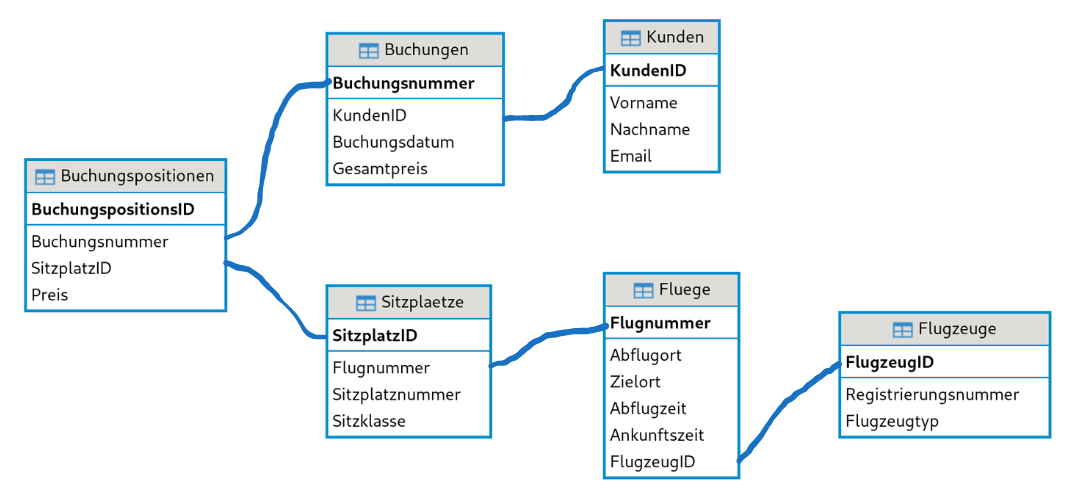